# TF-IDF + LOGISTIC REGRESSION

In [9]:
# ============================================================
# 1. IMPORT LIBRARY
# ============================================================
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# ============================================================
# 2. LOAD DATA
# ============================================================
df = pd.read_csv("/content/drive/MyDrive/KLASIFIKASI DATA/data label.csv")
df = df[df['labelContent'].notnull()]
X = df['content'].astype(str)
y = df['labelContent'].astype(str)

# ============================================================
# 3. TF-IDF VECTORIZE
# ============================================================
tfidf = TfidfVectorizer(
    max_features=5000,
    ngram_range=(1,2),
    min_df=2
)

X_tfidf = tfidf.fit_transform(X)

# ============================================================
# 4. TRAIN-TEST SPLIT
# ============================================================
X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf, y, test_size=0.3, random_state=42
)

# ============================================================
# 5. TRAIN MODEL LOGISTIC REGRESSION
# ============================================================
model = LogisticRegression(max_iter=300)
model.fit(X_train, y_train)

# ============================================================
# 6. PREDIKSI
# ============================================================
y_pred = model.predict(X_test)

# ============================================================
# 7. EVALUASI
# ============================================================
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.76

Classification Report:
              precision    recall  f1-score   support

    negative       0.73      0.94      0.82        32
     neutral       1.00      0.06      0.11        17
    positive       0.79      1.00      0.88        26

    accuracy                           0.76        75
   macro avg       0.84      0.67      0.60        75
weighted avg       0.81      0.76      0.68        75



In [3]:
!pip install gensim

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 23.1 MB/s eta 0:00:00


# TF-IDF + NAIVE BAYES

In [10]:
# ============================================================
# 1. IMPORT LIBRARY
# ============================================================
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# ============================================================
# 2. LOAD DATA
# ============================================================
df = pd.read_csv("/content/drive/MyDrive/KLASIFIKASI DATA/data label.csv")
df = df[df['labelContent'].notnull()]
X = df['content'].astype(str)
y = df['labelContent'].astype(str)

# ============================================================
# 3. TF-IDF VECTORIZE
# ============================================================
tfidf = TfidfVectorizer(
    max_features=3000,
    ngram_range=(1,2),
    min_df=2
)

X_tfidf = tfidf.fit_transform(X)

# ============================================================
# 4. TRAIN-TEST SPLIT
# ============================================================
X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf, y, test_size=0.3, random_state=24
)

# ============================================================
# 5. TRAIN NAIVE BAYES
# ============================================================
model = MultinomialNB()
model.fit(X_train, y_train)

# ============================================================
# 6. PREDIKSI
# ============================================================
y_pred = model.predict(X_test)

# ============================================================
# 7. EVALUASI
# ============================================================
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.7866666666666666

Classification Report:
              precision    recall  f1-score   support

    negative       0.77      0.86      0.81        35
     neutral       1.00      0.33      0.50        15
    positive       0.77      0.96      0.86        25

    accuracy                           0.79        75
   macro avg       0.85      0.72      0.72        75
weighted avg       0.82      0.79      0.76        75



# TF-IDF + SVM

Accuracy: 0.8133333333333334

Classification Report:
              precision    recall  f1-score   support

    negative       0.73      0.96      0.83        28
     neutral       0.71      0.33      0.45        15
    positive       0.94      0.91      0.92        32

    accuracy                           0.81        75
   macro avg       0.79      0.73      0.74        75
weighted avg       0.81      0.81      0.79        75



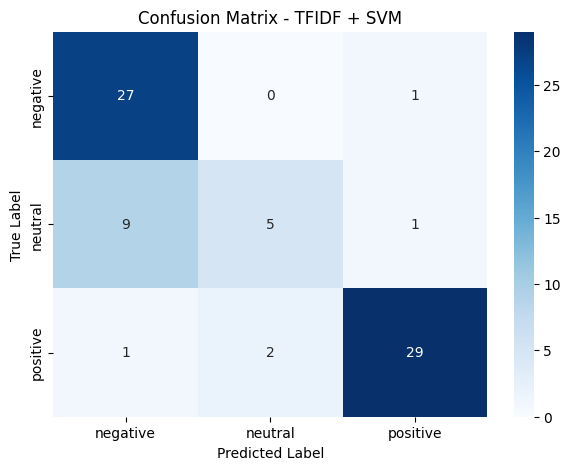

In [16]:
# ============================================================
# 1. IMPORT LIBRARY
# ============================================================
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# ============================================================
# 2. LOAD DATA
# ============================================================
df = pd.read_csv("/content/drive/MyDrive/KLASIFIKASI DATA/data label.csv")
df = df[df['labelContent'].notnull()]
X = df['content'].astype(str)
y = df['labelContent'].astype(str)

# ============================================================
# 3. TF-IDF VECTORIZE
# ============================================================
tfidf = TfidfVectorizer(
    max_features=5000,
    ngram_range=(1,2),
    min_df=2
)

X_tfidf = tfidf.fit_transform(X)

# ============================================================
# 4. TRAIN-TEST SPLIT
# ============================================================
X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf, y, test_size=0.3, random_state=16
)

# ============================================================
# 5. TRAIN MODEL SVM
# ============================================================
model = LinearSVC()
model.fit(X_train, y_train)

# ============================================================
# 6. PREDIKSI
# ============================================================
y_pred = model.predict(X_test)

# ============================================================
# 7. EVALUASI
# ============================================================
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# ============================================================
# 8. CONFUSION MATRIX
# ============================================================
cm = confusion_matrix(y_test, y_pred)
labels = sorted(y.unique())

plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - TFIDF + SVM")
plt.show()


# WORD2VEC + LSTM

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │       116,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 116,100 (453.52 KB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 116,100 (453.52 KB)

None
Epoch 1/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 242ms/step - accuracy: 0.3433 - loss: 1.0960 - val_accuracy: 0.3000 - val_loss: 1.0820
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 246ms/step - accuracy: 0.4276 - loss: 1.0801 - val_accuracy: 0.3000 - val_loss: 1.0449
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 209ms/step - accuracy: 0.4155 - loss: 1.0663 - val_accuracy: 0.3000 - val_loss: 1.0012
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 236ms/step - accuracy: 0.4690 - loss: 1.0461 - val_accuracy: 0.3000 - val_loss: 0.9793
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 284ms/step - accuracy: 0.4825 - loss: 1.0370 - val_accuracy: 0.7500 - val_loss: 0.9874
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 260ms/step - accuracy: 0.5170 - loss: 1.0563 - val_accuracy: 0.3000 - val_loss: 0.9890
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 251ms/step - accuracy: 0.4885 - loss: 1.0345 - val_accuracy: 0.7500 - val_loss: 0.8993
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 277ms/step - accuracy: 0.5416 - loss: 1.0011 - val_accuracy: 0.8000 - val_

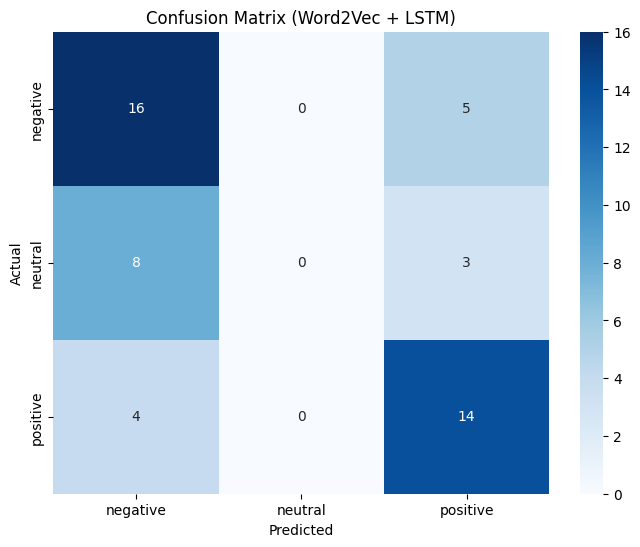

In [15]:
# ============================================================
# 1. IMPORT LIBRARY
# ============================================================
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
import matplotlib.pyplot as plt
import seaborn as sns

nltk.download('punkt')

# ============================================================
# 2. LOAD DATA
# ============================================================
df = pd.read_csv("/content/drive/MyDrive/KLASIFIKASI DATA/data label.csv")
df = df[df['labelContent'].notnull()]

texts = df['content'].astype(str).tolist()
labels = df['labelContent'].astype(str).tolist()

# ============================================================
# 3. TOKENIZATION FOR WORD2VEC TRAINING
# ============================================================
tokenized_texts = [word_tokenize(text.lower()) for text in texts]

# ============================================================
# 4. TRAIN WORD2VEC MODEL
# ============================================================
w2v_size = 100  # ukuran embedding

w2v_model = Word2Vec(
    sentences=tokenized_texts,
    vector_size=w2v_size,
    window=5,
    min_count=2,
    workers=4
)

# ============================================================
# 5. TOKENIZER FOR LSTM
# ============================================================
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)

sequences = tokenizer.texts_to_sequences(texts)
word_index = tokenizer.word_index

max_len = 100
padded_sequences = pad_sequences(sequences, maxlen=max_len)

# ============================================================
# 6. LABEL ENCODING
# ============================================================
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(labels)

# ============================================================
# 7. TRAIN-TEST SPLIT
# ============================================================
X_train, X_test, y_train, y_test = train_test_split(
    padded_sequences, y, test_size=0.2, random_state=42
)

# ============================================================
# 8. EMBEDDING MATRIX FOR LSTM
# ============================================================
vocab_size = len(word_index) + 1
embedding_matrix = np.zeros((vocab_size, w2v_size))

for word, i in word_index.items():
    if word in w2v_model.wv:
        embedding_matrix[i] = w2v_model.wv[word]

# ============================================================
# 9. LSTM MODEL
# ============================================================
model = Sequential()
model.add(Embedding(
    input_dim=vocab_size,
    output_dim=w2v_size,
    weights=[embedding_matrix],
    input_length=max_len,
    trainable=False   # freeze word2vec
))

model.add(LSTM(128, return_sequences=False))
model.add(Dropout(0.4))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(len(set(y)), activation='softmax'))

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

print(model.summary())

# ============================================================
# 10. TRAIN MODEL
# ============================================================
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.1
)

# ============================================================
# 11. EVALUATION
# ============================================================
loss, acc = model.evaluate(X_test, y_test)
print("Test Accuracy:", acc)

# ============================================================
# 12. CONFUSION MATRIX
# ============================================================
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_test, y_pred_classes)
labels_list = label_encoder.classes_

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=labels_list, yticklabels=labels_list, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Word2Vec + LSTM)")
plt.show()


# BOW + LOGISTIC REGRESSION

Accuracy: 0.8266666666666667

Classification Report:
              precision    recall  f1-score   support

    negative       0.74      0.93      0.83        28
     neutral       0.83      0.33      0.48        15
    positive       0.91      0.97      0.94        32

    accuracy                           0.83        75
   macro avg       0.83      0.74      0.75        75
weighted avg       0.83      0.83      0.80        75



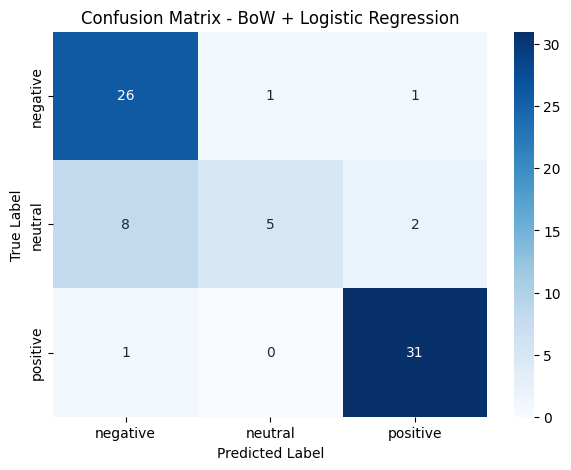

In [18]:
# ============================================================
# 1. IMPORT LIBRARY
# ============================================================
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# ============================================================
# 2. LOAD DATA
# ============================================================
df = pd.read_csv("/content/drive/MyDrive/KLASIFIKASI DATA/data label.csv")
df = df[df['labelContent'].notnull()]

X = df['content'].astype(str)
y = df['labelContent'].astype(str)

# ============================================================
# 3. BAG OF WORDS VECTORIZE
# ============================================================
bow = CountVectorizer(
    max_features=5000,
    ngram_range=(1,1),
    min_df=2
)

X_bow = bow.fit_transform(X)

# ============================================================
# 4. TRAIN-TEST SPLIT
# ============================================================
X_train, X_test, y_train, y_test = train_test_split(
    X_bow, y, test_size=0.3, random_state=16
)

# ============================================================
# 5. TRAIN MODEL LOGISTIC REGRESSION
# ============================================================
model = LogisticRegression(max_iter=2000)
model.fit(X_train, y_train)

# ============================================================
# 6. PREDIKSI
# ============================================================
y_pred = model.predict(X_test)

# ============================================================
# 7. EVALUASI
# ============================================================
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# ============================================================
# 8. CONFUSION MATRIX
# ============================================================
cm = confusion_matrix(y_test, y_pred)
labels = sorted(y.unique())

plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - BoW + Logistic Regression")
plt.show()
